In [ ]:
!pip3 install torch torchvision


In [ ]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
import torchvision
from torchvision import transforms

mnist = torchvision.datasets.MNIST('/.', download=True, transform=transforms.ToTensor())

In [ ]:
import torch.nn as nn

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, out=10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, 1) # in channels, out channels, kernel size, stride
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        self.linear = nn.Linear(128, out)

    def forward(self, x):
        x = self.conv1(x) # Applies a 1D convolution over an input signal composed of several input planes.
        x = F.relu(x) # max(0, x)
        x = F.max_pool2d(x, 4) # Applies a 2D max pooling over an input signal composed of several input planes.
        x = self.conv2(x) # Applies a 2D convolution over an input signal composed of several input planes.
        x = F.relu(x)
        x = F.max_pool2d(x, 4)
        x = torch.flatten(x, 1)
        x = self.linear(x) # Applies a linear transformation to the incoming data: 
        output = F.softmax(x, dim=1) # softmax
        return output

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target) # cross entropy
        loss.backward()
        optimizer.step()
        if batch % 20 == 0:
            print(f'epoch: {epoch}, batch: {batch}, loss: {loss.item()}')

def test(model, device, test_loader):
    model.eval()
    correct = 0
    i = 0
    for batch, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        i += target.shape[0]

    print(f'---- Accuracy {100.0 * correct / i}% ----')

In [ ]:

import torch.optim as optim
def run_train(model, train_loader, test_loader, epochs, file=None):
    torch.manual_seed(4)
    optimizer = optim.Adam(model.parameters(), lr=1e-3) # ADAM

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
    if file is not None:
        torch.save(model.state_dict(), file)

In [ ]:

from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

val_split = 0.15
batch_size = 32

mnist_indices = list(range(len(mnist)))
split = int(np.floor(val_split * len(mnist_indices)))
np.random.shuffle(mnist_indices)


train_indices, val_indices = mnist_indices[split:], mnist_indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(mnist, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(mnist, batch_size=batch_size,
                                         sampler=val_sampler)

epochs = 10
net = Net(10)
net.to(device)

run_train(net, train_loader, val_loader, epochs)

epoch: 1, batch: 0, loss: 2.301467180252075
epoch: 1, batch: 20, loss: 2.2748630046844482
epoch: 1, batch: 40, loss: 2.242309331893921
epoch: 1, batch: 60, loss: 2.2359542846679688
epoch: 1, batch: 80, loss: 2.093935489654541
epoch: 1, batch: 100, loss: 1.9649699926376343
epoch: 1, batch: 120, loss: 1.9782322645187378
epoch: 1, batch: 140, loss: 1.8568480014801025
epoch: 1, batch: 160, loss: 1.8934382200241089
epoch: 1, batch: 180, loss: 1.8617627620697021
epoch: 1, batch: 200, loss: 1.839401125907898
epoch: 1, batch: 220, loss: 1.9180448055267334
epoch: 1, batch: 240, loss: 1.8091163635253906
epoch: 1, batch: 260, loss: 1.9094352722167969
epoch: 1, batch: 280, loss: 1.7933043241500854
epoch: 1, batch: 300, loss: 1.8119661808013916
epoch: 1, batch: 320, loss: 1.7662835121154785
epoch: 1, batch: 340, loss: 1.7893264293670654
epoch: 1, batch: 360, loss: 1.8307952880859375
epoch: 1, batch: 380, loss: 1.7692846059799194
epoch: 1, batch: 400, loss: 1.820285677909851
epoch: 1, batch: 420, lo

In [ ]:
fashion_mnist = torchvision.datasets.FashionMNIST('/.', download=True, transform=transforms.ToTensor())

In [ ]:
val_split = 0.15
batch_size = 32

fmnist_indices = list(range(len(fashion_mnist)))
split = int(np.floor(val_split * len(fmnist_indices)))
np.random.shuffle(mnist_indices)


train_indices, val_indices = fmnist_indices[split:], fmnist_indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=batch_size,
                                         sampler=val_sampler)

epochs = 10
net = Net(10)
net.to(device)

run_train(net, train_loader, val_loader, epochs)



epoch: 1, batch: 0, loss: 2.3025214672088623
epoch: 1, batch: 20, loss: 2.3007843494415283
epoch: 1, batch: 40, loss: 2.2434637546539307
epoch: 1, batch: 60, loss: 2.046030282974243
epoch: 1, batch: 80, loss: 2.0594799518585205
epoch: 1, batch: 100, loss: 1.9189485311508179
epoch: 1, batch: 120, loss: 1.7873046398162842
epoch: 1, batch: 140, loss: 1.8623850345611572
epoch: 1, batch: 160, loss: 2.0150790214538574
epoch: 1, batch: 180, loss: 1.8762189149856567
epoch: 1, batch: 200, loss: 1.6985397338867188
epoch: 1, batch: 220, loss: 1.8115208148956299
epoch: 1, batch: 240, loss: 1.6081959009170532
epoch: 1, batch: 260, loss: 1.7637088298797607
epoch: 1, batch: 280, loss: 1.7313613891601562
epoch: 1, batch: 300, loss: 1.8071476221084595
epoch: 1, batch: 320, loss: 1.7365666627883911
epoch: 1, batch: 340, loss: 1.6926183700561523
epoch: 1, batch: 360, loss: 1.6964154243469238
epoch: 1, batch: 380, loss: 1.8053569793701172
epoch: 1, batch: 400, loss: 1.7433148622512817
epoch: 1, batch: 420

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


def plot_conf_matrix(y_true, y_pred):
    cf = confusion_matrix(y_true.view_as(y_pred), y_pred)
    ConfusionMatrixDisplay(cf).plot()
    plt.title(f'---- Accuracy {100.0 * accuracy_score(y_true, y_pred)}% ----')
    plt.show()

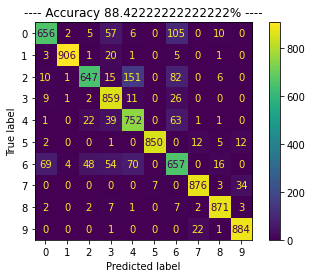

In [ ]:


net.eval()

all_predictions = None
all_trues = None

best_score = np.full(shape=(len(val_loader), len(val_loader)), fill_value=-1e20)
best_data = []

for i in range(0, len(val_loader)):
  best_data.append([None] * len(val_loader))

    
with torch.no_grad():
  for batch, (data_cpu, target_cpu) in enumerate(val_loader):

    data, target = data_cpu.to(device), target_cpu.to(device)
    output = net(data)
    
    for x, preds in enumerate(output):
      for y_pred, conf in enumerate(preds):
        
        score = conf.item()
        y_true = target_cpu.numpy()[x]
        
        if best_score[y_true][y_pred] < score:
          best_score[y_true][y_pred] = score
          best_data[y_true][y_pred] = data_cpu.numpy()[x][0]

    y_pred = output.argmax(dim=1, keepdim=True)
    y_true = target.view_as(y_pred)
    
    if all_predictions is None:
      all_predictions = y_pred.flatten()
      all_trues = y_true.flatten()
    else:
      all_predictions = torch.cat((all_predictions, y_pred.flatten()))
      all_trues = torch.cat((all_trues, y_true.flatten()))

plot_conf_matrix(all_trues.cpu(), all_predictions.cpu())



In [ ]:
def plot_classes(best_data):
    fig = plt.figure(figsize=(32, 32))
    columns = 10
    rows = 10
    labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    for i in range(0, rows):
        for j in range(0, columns):
            img = best_data[i][j]
            fig.add_subplot(rows, columns, i * columns + j + 1)
            plt.imshow(img, cmap='Wistia_r')
            plt.xlabel(labels[j])
    plt.show()

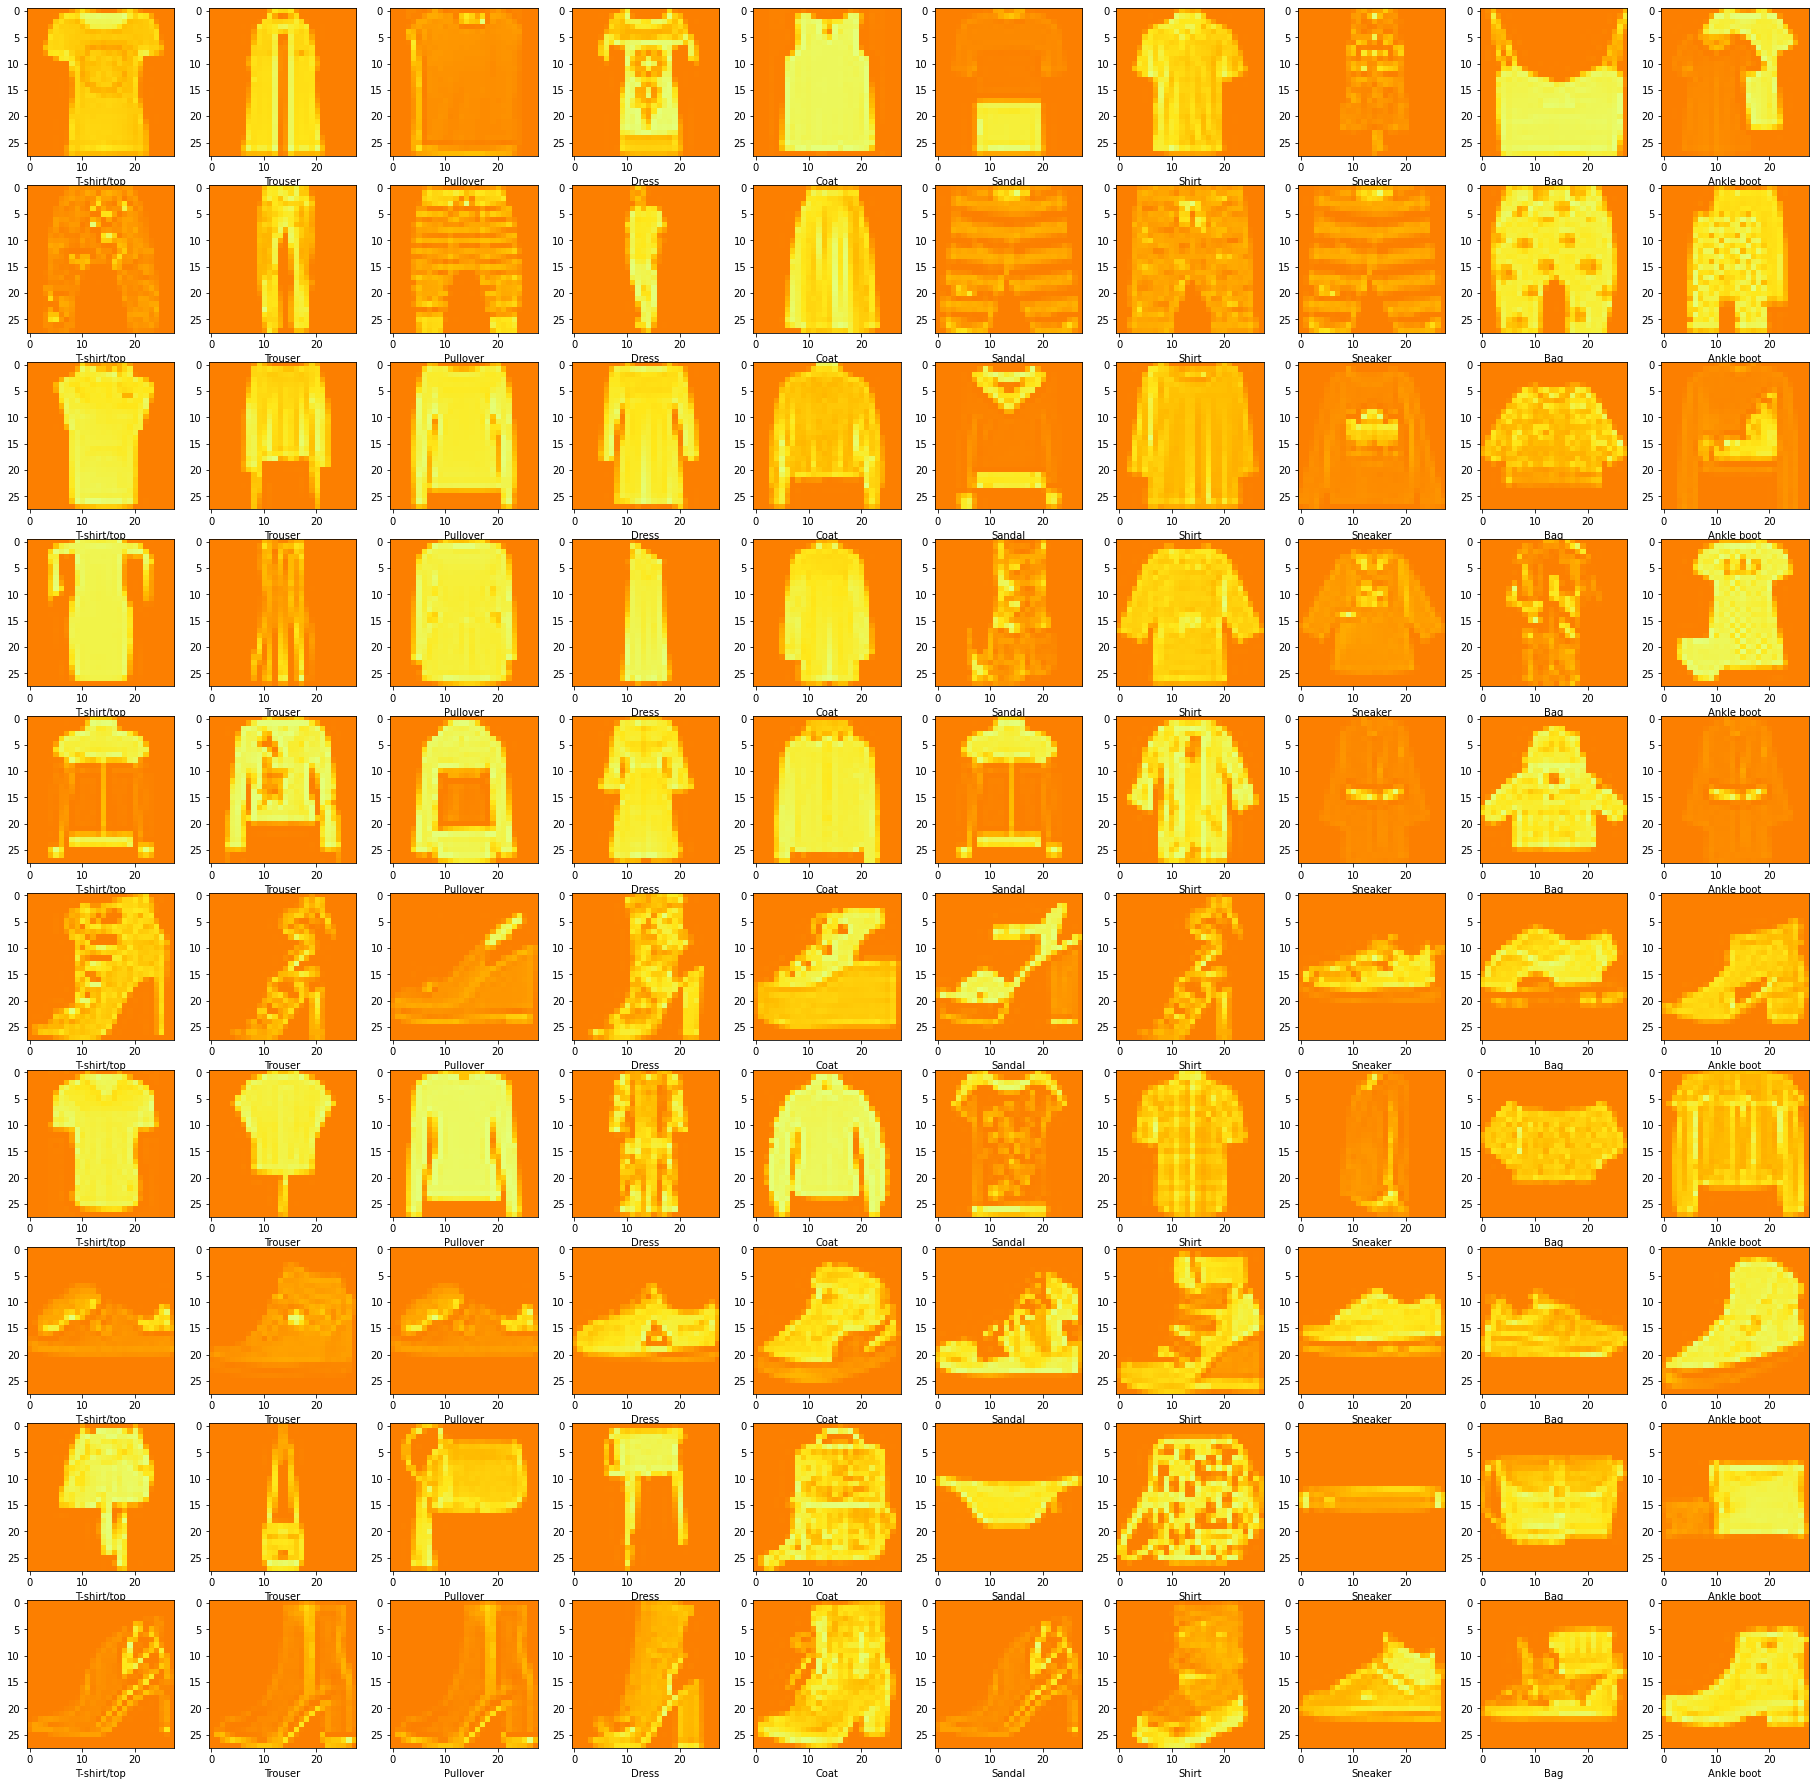

In [ ]:
plot_classes(best_data)